In [1]:
import os
import pandas as pd 
import numpy as np
#import matplotlib  as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import os, shutil, glob
import re, math
import seaborn as sns; sns.set_style("white")
import datetime
import gc
from pathlib import Path

from cytominer_eval import evaluate
#import plotly.graph_objects as go
#import plotly.offline as pyo
#import plotly.io as pio
#pio.renderers

os.getcwd()

'/home/jovyan/Christa/FromMaris'

In [2]:
figformat = "png"
dpi = 150

In [6]:
OutputDir = input("Enter name for output folder: ")  #
if not os.path.exists(OutputDir):
    os.makedirs(OutputDir)


Enter name for output folder:  test4


## Grit

In [7]:
dfZscores = pd.read_csv("./test/dfZscores4.csv", sep=";")
dfZscores = dfZscores.drop(dfZscores.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
dfZscores.head(3)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Count_nuclei,ObjectNumber_nuclei,ObjectNumber_cells,compound,conc,cmpd_conc
0,-0.982456,-1.876923,-0.049107,0.216102,0.155902,0.242063,-0.018650,0.361585,0.516468,-1.164103,...,1.556339,-0.273166,1.288063,1.382819,-1.396226,-1.421053,-1.617978,[tetr],2.50000,2.50000
1,-0.561404,0.548718,-1.138393,-0.105932,-1.198218,0.051587,-1.057567,0.084105,1.646825,0.071795,...,-0.338899,1.923748,0.279822,1.371941,1.132075,1.378947,1.078652,regora,0.00833,0.00833
2,-0.451128,0.087179,0.156250,4.156780,0.262806,3.964286,0.197940,3.977812,1.448783,0.307692,...,0.178464,-1.635373,-1.428591,-1.963792,1.509434,2.094737,1.483146,[dmso],0.10000,0.10000


In [8]:
dataset = dfZscores.copy()
dataset["CompRepl"] = (
    dataset["compound"] + "_" + dataset.index.astype(str)
)  # dataset.concentration.astype(str)#
datasetPart = dataset
datasetPart.iloc[:, :-10] = datasetPart.iloc[:, :-10].clip(lower=-100, upper=100)
datasetPart.head(1)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Count_nuclei,ObjectNumber_nuclei,ObjectNumber_cells,compound,conc,cmpd_conc,CompRepl
0,-0.982456,-1.876923,-0.049107,0.216102,0.155902,0.242063,-0.01865,0.361585,0.516468,-1.164103,...,-0.273166,1.288063,1.382819,-1.396226,-1.421053,-1.617978,[tetr],2.5,2.5,[tetr]_0


In [9]:
features = list(datasetPart.columns[0:-5])
meta_features = list(datasetPart.columns[-5:])

meta_features

['ObjectNumber_cells', 'compound', 'conc', 'cmpd_conc', 'CompRepl']

In [10]:
control_perts = datasetPart.query("compound == '[dmso]'").CompRepl.unique().tolist()

In [11]:
grit_replicate_groups = {"profile_col": "CompRepl", "replicate_group_col": "cmpd_conc"}

In [12]:
grit_scores = []

# for cell_line in datasetPart.plate.unique():
#    cell_line_df = datasetPart.query("plate == @cell_line")

grit_results = evaluate(
    profiles=datasetPart,
    features=features,
    meta_features=meta_features,
    replicate_groups=grit_replicate_groups,
    operation="grit",
    similarity_metric="pearson",
    grit_replicate_summary_method="median",
    grit_control_perts=control_perts,
)  # .assign(cell_line=cell_line)

grit_scores.append(grit_results)

In [13]:
grit_scores = pd.concat(grit_scores).reset_index(drop=True)
print(grit_scores.shape)
grit_scores.head()

(1227, 3)


,perturbation,group,grit
0,5-Fluo_136,0.333,0.228464
1,5-Fluo_147,0.1,0.498541
2,5-Fluo_165,1.0,0.518760
3,5-Fluo_214,0.0333,0.439225
4,5-Fluo_220,1.0,0.132766


In [14]:
grit_scores["perturbation"]

0       5-Fluo_136
1       5-Fluo_147
2       5-Fluo_165
3       5-Fluo_214
4       5-Fluo_220
           ...    
1222    vemura_507
1223    vemura_528
1224    vemura_580
1225    vemura_605
1226     vemura_91
Name: perturbation, Length: 1227, dtype: object

In [19]:
grit_scores["compound"] = grit_scores["perturbation"].str.split("_").str[0]
grit_scores["conc"] = grit_scores["group"]
grit_scores.tail(9)

,perturbation,group,grit,compound,conc
1218,vemura_416,0.00833,0.062208,vemura,0.00833
1219,vemura_42,0.00833,0.371590,vemura,0.00833
1220,vemura_462,0.1,0.475921,vemura,0.1
1221,vemura_483,10.0,-1.131245,vemura,10.0
1222,vemura_507,0.00833,-0.023280,vemura,0.00833
1223,vemura_528,1.0,0.477975,vemura,1.0
1224,vemura_580,10.0,-0.294593,vemura,10.0
1225,vemura_605,0.333,0.404472,vemura,0.333
1226,vemura_91,10.0,-0.853835,vemura,10.0


In [16]:
grit_scores.to_csv("{}/grit_scores.csv".format(OutputDir), sep=";")

In [17]:
CompoundsUsed = sorted(list(set(grit_scores["compound"])))
print(CompoundsUsed)
print(len(CompoundsUsed))

['5-Fluo', '5Z-7-O', 'ABT-73', 'AMG 23', 'AZD454', 'AZD776', 'AZD805', 'Abemac', 'Afatin', 'BMS-75', 'Crizot', 'Dabraf', 'Encora', 'Gefiti', 'LGK974', 'LY2603', 'Linsit', 'MK-177', 'MK-220', 'Navito', 'Nutlin', 'Olapar', 'Oxalip', 'PD0325', 'PI-103', 'Paclit', 'Palboc', 'Ruxoli', 'SB2167', 'SB5051', 'SN-38', 'Sapiti', 'Taseli', 'Temozo', 'Tramet', 'Velipa', 'Vinore', '[berb]', '[dmso]', '[etop]', '[fenb]', '[flup]', '[tetr]', 'alpeli', 'binime', 'cobime', 'regora', 'tricir', 'triflu', 'vemura']
50


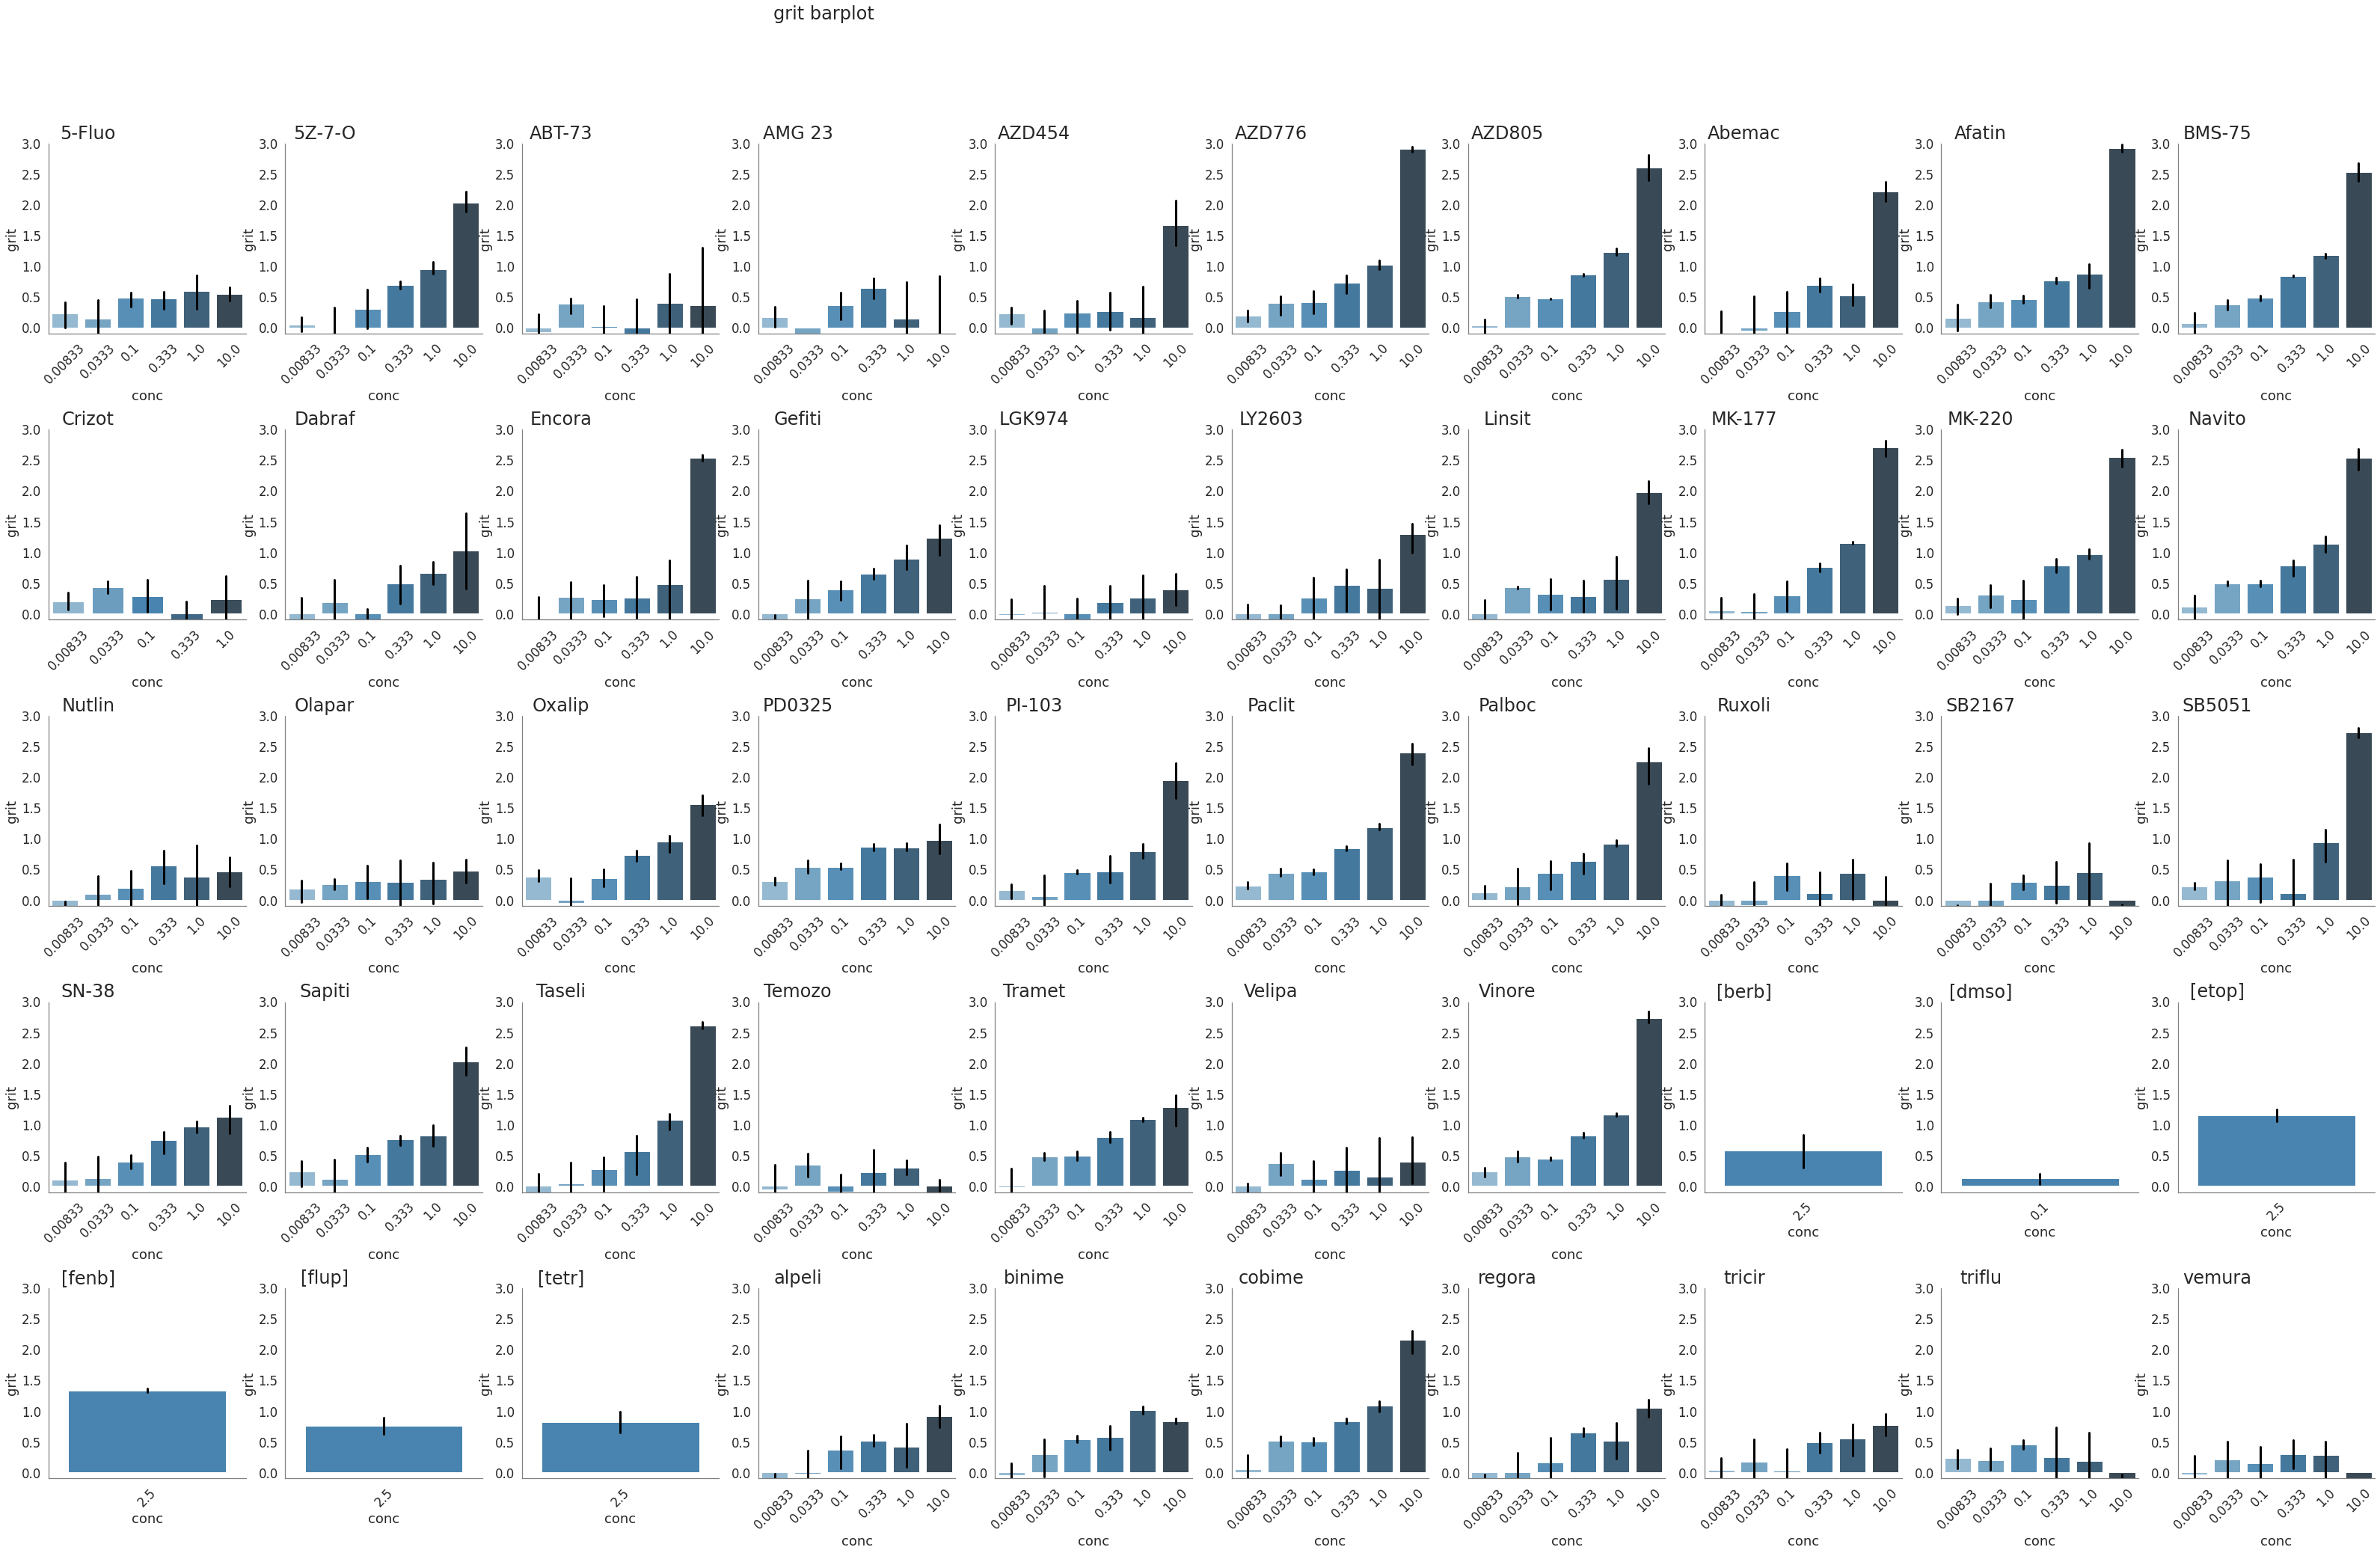

In [18]:
fig = plt.figure(figsize=(48, 32))
sns.set(font_scale=1.5)
fig.suptitle("grit barplot", fontsize=24, x=0.3)
sp = 1
nrrow = 5
nrcol = 10
for some in CompoundsUsed[:]:
    grit_scores_part = grit_scores[grit_scores["compound"] == some].copy()
    grit_scores_part.sort_values(by="conc", inplace=True)
    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax = sns.barplot(
        x="conc",
        y="grit",
        data=grit_scores_part,
        palette="Blues_d",
        alpha=1,
        errcolor="black",
        errwidth=3,
    )
    ax.set_facecolor("w")
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.set_ylim([-0.1, 3])
    ax.set_title("{}".format(some), fontsize=24, x=0.2)
    plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5, left=0.0)
    plt.xticks(rotation = 45)
    sp += 1
fig.savefig(
    "{}/grit_barplots.{}".format(OutputDir, "png"), dpi=150, bbox_inches="tight"
)
fig.savefig(
    "{}/grit_barplots.{}".format(OutputDir, "pdf"), dpi=300, bbox_inches="tight"
)
plt.show()
